# Часть I. Односторонние разностные схемы.

Напишите функцию `deriv`, которая вычисляет производную аргумента в заданной точке $x$, используя одностороннюю разностную схему с заданным шагом $h$ и степенью аппроксимации $O(h^2)$.

In [96]:
def deriv(f, x, h):
    """ Compute a derivative of `f` at point `x` with step size `h`.
    
    Compute the derivative using the one-sided rule of the approximation order of $O(h^2)$.
    
    Parameters
    ----------
    f : callable
        The function to differentiate
    x : float
        The point to compute the derivative at.
    h : float
        The step size for the finite different rule.
        
    Returns
    -------
    fder : derivative of f(x) at point x using the step size h.
    """
    return ( -1.5 * f(x) + 2 * f(x+h) - 0.5 * f(x + 2*h) ) / h

#### Тест I.1

Проверьте ваш алгоритм на простом примере: продифференцируйте $f(x) = x^3$ в точке $x=0$. Прокомментируйте, совпадает ли результат с ожидаемым $f'(x) = 0$ при стремлении $h\to 0$.

 (10% итоговой оценки)

In [97]:
x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(lambda x: x**3, x, h)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.0002
0.001000 --  -2e-06
0.000100 --  -2e-08
0.000010 --  -2e-10


Точность пропорциональна квадрату шага

### Тест I.2

Теперь попробуйте немного более сложную функцию $f(x) = x^2 \log{x}$. Оцените значение производной в точке $x=1$, используя двухточечную и трехточечную схемы. Для обеих схем оцените значение $h$, при котором ошибка перестанет падать.

(15% итоговой оценки)

In [98]:
from math import log

def f(x):
    return x**2 * log(x)
    
def fder(x):
    return x * (2.*log(x) + 1)

In [99]:
def derr(f, x, h):
    
    return ( f(x + h) - f(x) ) / h

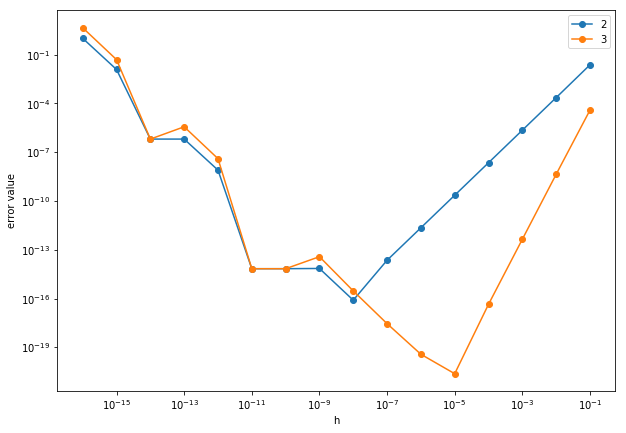

In [146]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 7))

x = 1
h = [ 1 / 10**i for i in range (1,17)]

err1 = [ ( derr(f, x, h[i]) - fder(x) )**2 for i in range( len(h) ) ]
err2 = [ ( deriv(f, x, h[i]) - fder(x) )**2 for i in range( len(h) ) ]

plt.plot(h, err1, 'o-', label = '2')
plt.plot(h, err2, 'o-', label = '3')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('h')
plt.ylabel('error value')
plt.legend(loc = 'best')
plt.show()

#mins in 1e-8 and 1e-3

### Тест I.3 

Теперь продифференцируйте $x^2 \log(x)$ в $x=0$. Используйте трехточечную схему. Заметьте, что в нуле функцию нужно доопределить явным образом. Проверьте шкалированные ошибки. Объясните полученные результаты.

(25% итоговой оценки)

In [101]:
def f(x):
    if x == 0:
        # предел $x^2 log(x)$ при $x-> 0$ равен нулю, хотя log(x) не определен в x=0
        return 0.0
    else:
        return x**2 * log(x)
    
def fder(x):
    if x == 0:
        return 0.0
    else:
        return x*(2*log(x) + 1)

x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(f, x, h) - fder(x)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.01386
0.001000 -- -0.001386
0.000100 -- -0.0001386
0.000010 -- -1.386e-05


Сходимость линейная, тк здесь в разложении важна третья производная, пропорциональная 1/x. Это соответствует полученным нами ранее результатам.

# Часть II. Правило центральной точки 

Напишите функцию, вычисляющую определенный интеграл, используя правило центральной точки, с точностью до заданной погрешности $\epsilon$. Оцените ошибку, сравнивая значения интеграла для $N$ и $2N$ элементарных интервалов.

In [ ]:
def midpoint_rule(func, a, b, eps):
    """ Calculate the integral of f from a to b using the midpoint rule.
    
    Parameters
    ----------
    func : callable
        The function to integrate.
    a : float
        The lower limit of integration.
    b : float
        The upper limit of integration.
    eps : float
        The target accuracy of the estimate.
        
    Returns
    -------
    integral : float
        The estimate of $\int_a^b f(x) dx$.
    """
    mid = float((a + b) / 2)
    temp = func( mid )
    S = (b - a) * temp 
    top = int(1e100)
    
    for num in range(3, top ):
        
        dots = np.linspace(a, b, num)
        points = ( dots [1:] + dots[:-1] ) / 2
        h = (b - a) / num
        
        SS  = h * np.sum( func(points) )
        
        if abs( SS - S ) < eps:
            
            return SS, num
        
        else:
            
            S = SS
        
    return 0, 0

### Тест II.1

Протестирутйте ваш алгоритм на простом интеграле, который вы можете посчитать аналитически.

Сравните скорость сходимости с ожидаемой $O(N^{-2})$ в зависимости от количества интервалов, необходимых для заданной точности $\epsilon$.

Сравните полученный результат с ответом, вычисленным "руками". Попадает ли результат в интервал заданной ошибки?

(20% итоговой оценки)


... ENTER YOUR CODE AND COMMENTS HERE ...

[9.6542518]


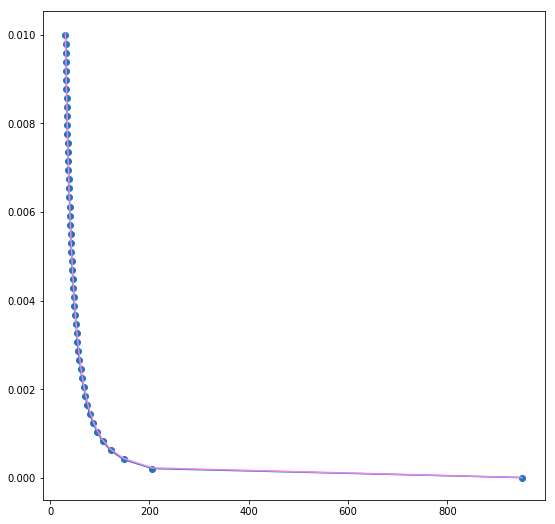

In [138]:
from scipy.optimize import curve_fit

def f_ch(x, a):
    return  a / x**2

def fm(x):
    return  x**2

eps = np.linspace(1e-5, 1e-2, 50)

points = []

for i in eps:
    S, n = midpoint_rule(fm, 0, 3, i)
    points.append(n)
points = np.array(points)

I, pcov = curve_fit(f_ch, points, eps)
print(I)

plt.figure(figsize = (9,9))
plt.plot(points, eps, 'o-' ) 
plt.plot(points, f_ch(points, I), color = 'violet')
plt.show()



#видно, что сходится как надо (1/x**2), значение улетело немного

### Тест II.2

Используя ваш алгоритм, посчитайте значение

$$
\int_0^1\! \frac{\sin{\sqrt{x}}}{x}\, dx
$$

с точностью до $\epsilon=10^{-4}$.

Заметим, что интеграл содержит интегрируемую особенность в нижнем пределе. Выполните вычисление двумя способами: во первых, посчитайте интеграл "в лоб", во вторых, вычтите особенность из подынтегрального выражения. Сравните количество необходимых итераций для достижения заданной точности $\epsilon$.

(30% итоговой оценки)

In [140]:
def fn(x):
    return np.sin(np.sqrt(x)) / x

print(midpoint_rule(fn, 0, 1, eps = 1e-4)[0], midpoint_rule(fn, 0, 1, eps = 1e-4)[1])

def f_eq(x):
    
    return fn(x) - 1 / (np.sqrt(x))

print('1.89217 говорит Вольфрам')
print(midpoint_rule(f_eq, 0, 1, eps = 1e-4)[0]+ 2, midpoint_rule(f_eq, 0, 1, eps = 1e-4)[1])

1.8475439129288769 261
1.89217 говорит Вольфрам
1.8953823084989556 33


In [49]:
# woah yes that's much faster
# and more accurate!